In [3]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

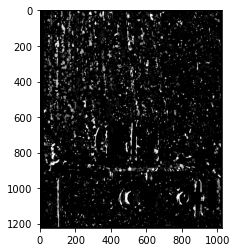

In [3]:
imgL = cv.imread(r'Z:\Students\lslusny\datasets\Basler\v5\x\data\cam0\mono\0_deg.png',0)
imgR = cv.imread(r'Z:\Students\lslusny\datasets\Basler\v5\x\data\cam40\mono\0_deg.png',0)
stereo = cv.StereoBM_create(numDisparities=16, blockSize=15)
disparity = stereo.compute(imgL,imgR)
plt.imshow(disparity,'gray')
plt.show()

In [1]:
import numpy as np
import cv2

# Check for left and right camera IDs
'''
# These values can change depending on the system
CamL_id = 2 # Camera ID for left camera
CamR_id = 0 # Camera ID for right camera
CamL= cv2.VideoCapture(CamL_id)
CamR= cv2.VideoCapture(CamR_id)

# Reading the mapping values for stereo image rectification
cv_file = cv2.FileStorage("data/stereo_rectify_maps.xml", cv2.FILE_STORAGE_READ)
Left_Stereo_Map_x = cv_file.getNode("Left_Stereo_Map_x").mat()
Left_Stereo_Map_y = cv_file.getNode("Left_Stereo_Map_y").mat()
Right_Stereo_Map_x = cv_file.getNode("Right_Stereo_Map_x").mat()
Right_Stereo_Map_y = cv_file.getNode("Right_Stereo_Map_y").mat()
cv_file.release()
'''
def nothing(x):

    pass

cv2.namedWindow('disp',cv2.WINDOW_NORMAL)
cv2.resizeWindow('disp',600,600)

cv2.createTrackbar('numDisparities','disp',1,17,nothing)
cv2.createTrackbar('blockSize','disp',5,50,nothing)
cv2.createTrackbar('preFilterType','disp',1,1,nothing)
cv2.createTrackbar('preFilterSize','disp',2,25,nothing)
cv2.createTrackbar('preFilterCap','disp',5,62,nothing)
cv2.createTrackbar('textureThreshold','disp',10,100,nothing)
cv2.createTrackbar('uniquenessRatio','disp',15,100,nothing)
cv2.createTrackbar('speckleRange','disp',0,100,nothing)
cv2.createTrackbar('speckleWindowSize','disp',3,25,nothing)
cv2.createTrackbar('disp12MaxDiff','disp',5,25,nothing)
cv2.createTrackbar('minDisparity','disp',5,25,nothing)

# Creating an object of StereoBM algorithm
stereo = cv2.StereoBM_create()

while True:

    Left_nice = cv2.imread(r'C:\Users\lenna\Desktop\BA\code\results\Basler\led\LR\L.png',0)
    Right_nice = cv2.imread(r'C:\Users\lenna\Desktop\BA\code\results\Basler\led\LR\R.png',0)
    '''
    # Capturing and storing left and right camera images
    retL, imgL= CamL.read()
    retR, imgR= CamR.read()

   # Proceed only if the frames have been captured
    if retL and retR:
        imgR_gray = cv2.cvtColor(imgR,cv2.COLOR_BGR2GRAY)
        imgL_gray = cv2.cvtColor(imgL,cv2.COLOR_BGR2GRAY)

    # Applying stereo image rectification on the left image
    Left_nice= cv2.remap(imgL_gray,
              Left_Stereo_Map_x,
              Left_Stereo_Map_y,
              cv2.INTER_LANCZOS4,
              cv2.BORDER_CONSTANT,
              0)

    # Applying stereo image rectification on the right image
    Right_nice= cv2.remap(imgR_gray,
              Right_Stereo_Map_x,
              Right_Stereo_Map_y,
              cv2.INTER_LANCZOS4,
              cv2.BORDER_CONSTANT,
              0)
'''
    # Updating the parameters based on the trackbar positions
    numDisparities = cv2.getTrackbarPos('numDisparities','disp')*16
    blockSize = cv2.getTrackbarPos('blockSize','disp')*2 + 5
    preFilterType = cv2.getTrackbarPos('preFilterType','disp')
    preFilterSize = cv2.getTrackbarPos('preFilterSize','disp')*2 + 5
    preFilterCap = cv2.getTrackbarPos('preFilterCap','disp')
    textureThreshold = cv2.getTrackbarPos('textureThreshold','disp')
    uniquenessRatio = cv2.getTrackbarPos('uniquenessRatio','disp')
    speckleRange = cv2.getTrackbarPos('speckleRange','disp')
    speckleWindowSize = cv2.getTrackbarPos('speckleWindowSize','disp')*2
    disp12MaxDiff = cv2.getTrackbarPos('disp12MaxDiff','disp')
    minDisparity = cv2.getTrackbarPos('minDisparity','disp')
     
    # Setting the updated parameters before computing disparity map
    stereo.setNumDisparities(numDisparities)
    stereo.setBlockSize(blockSize)
    stereo.setPreFilterType(preFilterType)
    stereo.setPreFilterSize(preFilterSize)
    stereo.setPreFilterCap(preFilterCap)
    stereo.setTextureThreshold(textureThreshold)
    stereo.setUniquenessRatio(uniquenessRatio)
    stereo.setSpeckleRange(speckleRange)
    stereo.setSpeckleWindowSize(speckleWindowSize)
    stereo.setDisp12MaxDiff(disp12MaxDiff)
    stereo.setMinDisparity(minDisparity)

    # Calculating disparity using the StereoBM algorithm
    disparity = stereo.compute(Left_nice,Right_nice)

    # NOTE: Code returns a 16bit signed single channel image,
    #CV_16S containing a disparity map scaled by 16. Hence it
    # is essential to convert it to CV_32F and scale it down 16 times.


    # Converting to float32
    disparity = disparity.astype(np.float32)

    # Scaling down the disparity values and normalizing them
    disparity = (disparity/16.0 - minDisparity)/numDisparities

    # Displaying the disparity map
    cv2.imshow("disp",disparity)

    # Close window using esc key
    if cv2.waitKey(1) == 27:
        break

error: OpenCV(3.4.2) C:\projects\opencv-python\opencv\modules\calib3d\src\stereobm.cpp:1120: error: (-211:One of arguments' values is out of range) preFilterType must be = CV_STEREO_BM_NORMALIZED_RESPONSE in function 'cv::StereoBMImpl::compute'
